In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [17]:
df= pd.read_csv('IESCO_dataset.csv')
df.dropna(inplace=True)
describe = df.describe()
print(describe)


              Hour       DryBulb        DewPnt  target_variable      Humidity
count  13128.00000  13128.000000  13128.000000     13128.000000  13128.000000
mean      12.50000     43.444851     31.902118      1212.993068     69.366469
std        6.92245     19.413433     20.883705       357.145898     17.259005
min        1.00000     -7.000000    -24.000000       430.000000     14.000000
25%        6.75000     29.000000     17.000000       973.000000     58.000000
50%       12.50000     40.000000     30.000000      1125.000000     71.000000
75%       18.25000     58.000000     50.000000      1386.250000     83.000000
max       24.00000     93.000000     75.000000      2713.000000     99.000000


In [18]:
x = df
y = df["target_variable"]
df.shape
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(df)
s2 = MinMaxScaler(feature_range=(0,1))
ys = s2.fit_transform(df[['target_variable']])

In [19]:
window= 5
X=[]
Y=[]
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(ys[i])
X,Y = np.array(X), np.array(Y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
import tensorflow as tf    

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=32, return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),
    tf.keras.layers.LSTM(units=32,return_sequences=True),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(units=1, activation='linear', name='output_layer')
])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')

288/288 [==============================] - 18s 27ms/step - loss: 0.0868 - val_loss: 0.0529
Epoch 1/200 - Train Loss: 0.0868 - Val Loss: 0.0529
288/288 [==============================] - 6s 19ms/step - loss: 0.0542 - val_loss: 0.0448
Epoch 2/200 - Train Loss: 0.0542 - Val Loss: 0.0448
288/288 [==============================] - 5s 17ms/step - loss: 0.0507 - val_loss: 0.0432
Epoch 3/200 - Train Loss: 0.0507 - Val Loss: 0.0432
288/288 [==============================] - 6s 20ms/step - loss: 0.0492 - val_loss: 0.0432
Epoch 4/200 - Train Loss: 0.0492 - Val Loss: 0.0432
288/288 [==============================] - 6s 22ms/step - loss: 0.0475 - val_loss: 0.0396
Epoch 5/200 - Train Loss: 0.0475 - Val Loss: 0.0396
288/288 [==============================] - 6s 22ms/step - loss: 0.0442 - val_loss: 0.0447
Epoch 6/200 - Train Loss: 0.0442 - Val Loss: 0.0447
288/288 [==============================] - 6s 22ms/step - loss: 0.0415 - val_loss: 0.0400
Epoch 7/200 - Train Loss: 0.0415 - Val Loss: 0.0400
288/2

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


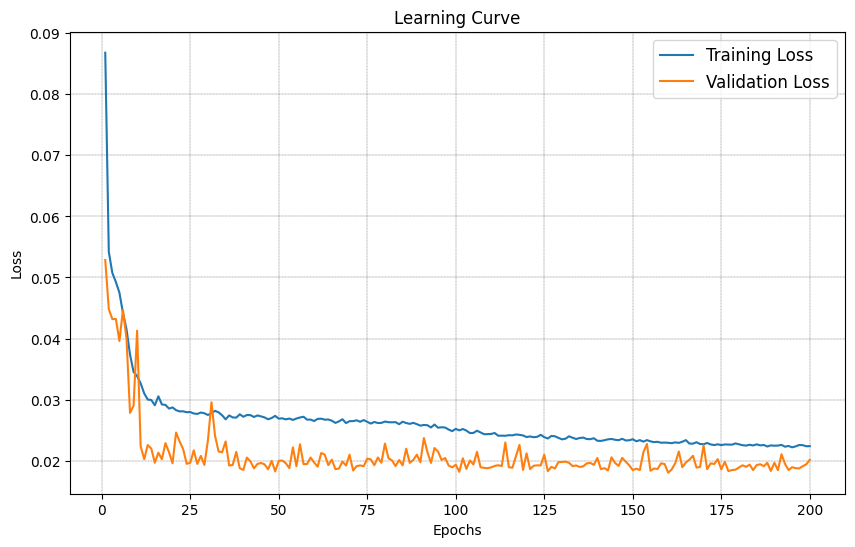

In [23]:
import time

import matplotlib.pyplot as plt

train_losses = []
val_losses = []

start = time.time()
epochs = 200

for epoch in range(epochs):
    history = model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test), 
                        verbose=1, batch_size=32)
    

    train_loss = history.history['loss'][0]
    val_loss = history.history['val_loss'][0]
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Print progress
    print(f'Epoch {epoch + 1}/{epochs} - Train Loss: {train_loss:.4f} - Val Loss: {val_loss:.4f}')

end = time.time()
convergence_time = end - start


plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.2)
plt.legend(prop={"size":12})
plt.grid(True)
plt.savefig('IESCO_LSTM_learning.eps',bbox_inches='tight')
plt.savefig('IESCO_LSTM_learning.pdf',bbox_inches='tight')
plt.show()

In [24]:
start= time.time()
y_pred= model.predict(X_test)
end= time.time()
inference_time= end-start

124/124 [==============================] - 4s 7ms/step


In [25]:
y_pred = s2.inverse_transform(y_pred)
y_test = s2.inverse_transform(y_test)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

In [27]:

rmse= np.sqrt(mean_squared_error(y_test, y_pred))
mae =  mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)*100
mse= mean_squared_error(y_test, y_pred)
nrmse = (rmse/np.mean(y_pred))*100
print("conergence time is:", convergence_time)
print("inference time is:",inference_time)
print("RMSE: ", rmse)
print("mae", mae)
print("mape", mape)
print("mse",mse)
print("nrmse", nrmse)

conergence time is: 1104.9701306819916
inference time is: 4.000125169754028
RMSE:  68.01469429612571
mae 46.018695826454156
mape 4.614952599861862
mse 4625.998640195436
nrmse 6.456024816587147


In [28]:
y_pred= pd.DataFrame(y_pred)
y_test= pd.DataFrame(y_test)

In [29]:
result_df = pd.concat([y_pred, y_test], axis=1)
result_df.to_csv(r"C:\Users\hp\Desktop\New folder\IESCO\LSTM\LSTM_output.csv", index=False)